# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

First, I'm loading the csv data provided to inspect it's structure 

In [2]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


From the info above, I can see there are 3 groups of features:
- Categorical: Clothing ID, Division Name, Department Name and Class Name
- Numerical: Age, Positive Feedback Count
- Text: Title, Review Text

## Preparing features (`X`) & target (`y`)

Next, I'll split the dataframe into:
- X: all columns except the taregt (Recommended ID)
- y: Recommended IND

For ease of modeling, I'm also creating a new comlumn that's combined the text content in **Review Text** and **Title**

In [3]:
data = df
# creating a new combined text feature
data["Review Text with Title"] = data["Title"] + " " + data["Review Text"]
# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

# confirms the distribution of labels and features
print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text with Title
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...


Then I split the dataset into training and test set with train_test_split

In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

# Your Work

## Data Exploration

As the first step of data exploration, I'm using .describe() to take a closer look at the numeric features and use matplotlib histogram to understand its distribution

In [5]:
df.describe()

,Clothing ID,Age,Positive Feedback Count,Recommended IND
count,18442.000000,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484,0.816235
std,141.571783,12.246264,5.942220,0.387303
min,2.000000,18.000000,0.000000,0.000000
25%,863.000000,34.000000,0.000000,1.000000
50%,952.000000,41.000000,1.000000,1.000000
75%,1078.000000,52.000000,3.000000,1.000000
max,1205.000000,99.000000,122.000000,1.000000


**Note**

- Clothing ID: even though it is a numerical value in nature, but has no numerical meaning for the purpose of the model, it will be treated as categorical
- Recommended IND: even though it is a numerical value in nature, it is going to be a one-hot value for the target of the model

These two columns will be excluded for any numerical analysis from this point on

Next, I plot the **Age** and **Postive Feedback Count** features on a historgram to view its distribution

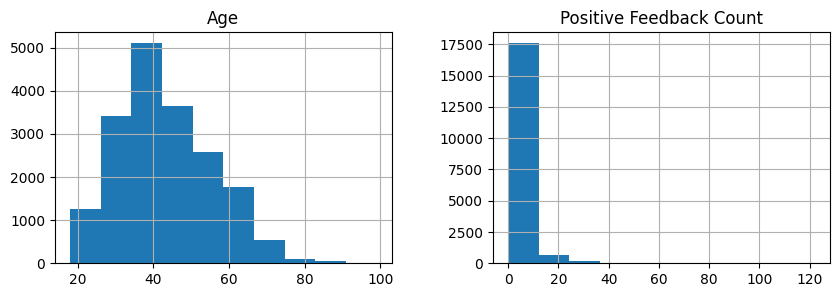

In [6]:
import matplotlib.pyplot as plt

df[["Age","Positive Feedback Count"]].hist(bins=10, figsize=(10,3))
plt.show()

We can see some quick high-level summary on the customer population who have left a review:

- A majority of the customers leaving reviews are around 40 years old
- A majority of the reviews has positive feedback count between 0 - 10

### Explore the categorical features

Since there are 4 out of the 8 features are categorical, I'd like to see how many unique values are in each columns, so I can keep this in mind when determining if all features should be included in the final model, especailly for "Clothing ID", since it is an "ID" type of column, it may have a lot of unique values but not contributing to the performance of the model and make the training process take a lot longer

In [7]:
# Change 'Clothing ID' to categorical type
df['Clothing ID'] = df['Clothing ID'].astype('object')

# Select categorical columns (object or category dtype)
categorical_cols = df.drop(columns=["Title","Review Text", "Review Text with Title"]).select_dtypes(include=['object', 'category'])

# Count unique values for each categorical column
unique_counts = categorical_cols.nunique()
print(unique_counts)

Clothing ID        531
Division Name        2
Department Name      6
Class Name          14
dtype: int64


**Note:**

As we can see here, **Clothing ID** has significantly more categories than the other categorical features, I will proceed my analysis without this feature for now, and revisit this if the model performance is not satisfactory

### Correlation Analysis

Here I'm using a correlation matrix to see if there is any close correlation between any specific features and the target:

- Since there are text and categorical features, the text features will need to be dropped for this analysis, and the categorical feature will need to be encoded
- I choose OneHotEncoder because none of the categorical features has an inherent logical order
- I also dropped **Clothing ID** for the reason outlined above

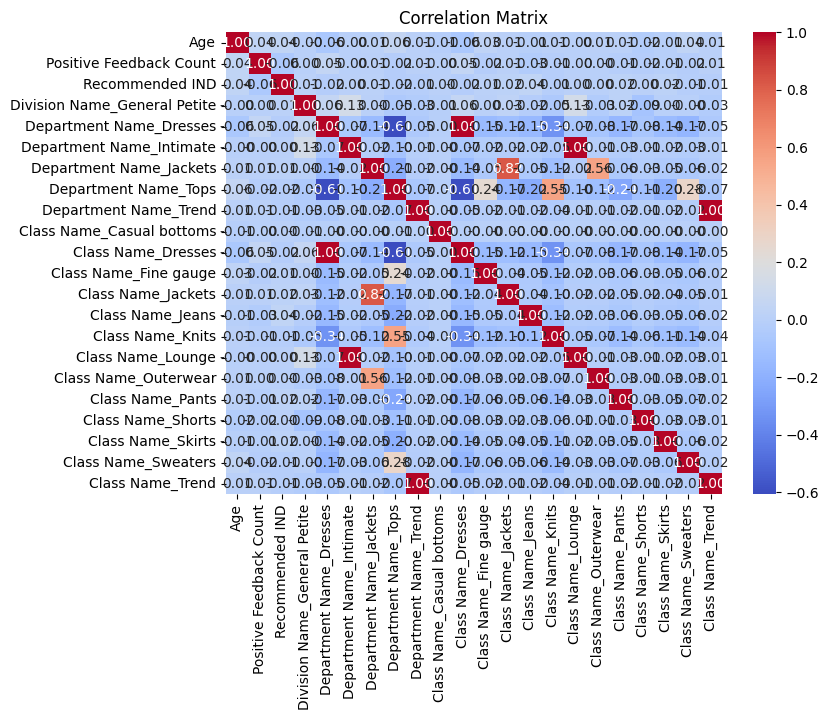

Recommended IND                 1.000000
Age                             0.036656
Class Name_Jeans                0.036536
Class Name_Skirts               0.017414
Class Name_Pants                0.016522
Class Name_Jackets              0.015723
Department Name_Jackets         0.014148
Class Name_Fine gauge           0.011118
Division Name_General Petite    0.008875
Department Name_Intimate        0.004945
Class Name_Lounge               0.004945
Class Name_Shorts               0.004488
Class Name_Casual bottoms       0.003494
Class Name_Outerwear            0.001872
Department Name_Trend          -0.011682
Class Name_Trend               -0.011682
Class Name_Knits               -0.013418
Class Name_Sweaters            -0.014191
Department Name_Tops           -0.018187
Department Name_Dresses        -0.021570
Class Name_Dresses             -0.021570
Positive Feedback Count        -0.058392
Name: Recommended IND, dtype: float64

In [8]:
# Drop non-numeric columns and apply one-hot encoding
data_num = data.drop(['Clothing ID', 'Title', 'Review Text','Review Text with Title'], axis=1)
data_num = pd.get_dummies(data_num, drop_first=True)

# Compute correlation matrix
corr_matrix = data_num.corr()

# Visualize the correlation matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display correlations with the target variable
corr_matrix["Recommended IND"].sort_values(ascending=False)


**Observations:**

From the initial correlation list, none of the features have significant correlation with **Recommended IND**

A classification model that includes NLP will be a good fit for this analysis

## Building Pipeline

With the understanding of the data from above analysis, I move on to build preprocessing pipeline for the dataset.

When buidling the pipeline, it is important to handle the different data types differently. I will be creating 3 groups of features:

- Numerical: num_features
- Categorical: cat_features
- Text: text_features

In [9]:
from sklearn.pipeline import Pipeline

num_feattures = (X[['Age', 'Positive Feedback Count']].columns)
print("Numerical features:", num_feattures)

cat_features = (X[['Department Name', 'Class Name', 'Division Name']].columns)
print("Categorical features:", cat_features)

text_features = X[['Review Text with Title']].columns
print("Text features:", text_features)


Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Department Name', 'Class Name', 'Division Name'], dtype='object')
Text features: Index(['Review Text with Title'], dtype='object')


### Creating pipeline for numerical features

Even though there is no null values in the provided dataset, I'm keeping the imputer here to handle possible future null values

I'm using MinMaxScaler instead of StandardScaler to preserve the distribution and given that there is no obvious outliers

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

num_pipeline

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,feature_range,"(0, ...)"


### Creating pipeline for categorical features

I'm using OneHotEncoder instead of OrdicalEncoder because there is no inherent order in the categorical features

In [11]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

cat_pipeline

,steps,"[('imputer', ...), ('onehot', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


### Creating pipeline for text featurse

For the two text features: **Title** and **Review Text**, I will split the preprocessing into two pipelines:

- 1. Utilize a custom class to count characters like ' '(space), !, and ?
- 2. Utilize TfidfVectorizer with SpaCy to handle lemmatization 

For each part, I'm also using numpy reshape to make sure the text data is in the correct shape

### Creating the pipeline for character count

First I created the custom transform to count the nunmber of occurance based the match with a specific list of characters

In [12]:
# Create a custom transformer to count occurrences of a list of specific character
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class CountCharacters(BaseEstimator, TransformerMixin):
    def __init__(self, character:str):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.array(X).ravel()
        result = []
        for text in X:
            counts = [text.count(c) for c in self.character]
            result.append(counts)
        return np.array(result)

Then I created the pipeline that includes a shaper to make sure the data is in the correct shape, then calls the customn transformer to get the occurance of these characters

In [13]:
# Build the complete pipeline for chracter counts
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

character_counts_pipeline = Pipeline(steps=[
     ('dimension_reshaper',FunctionTransformer(lambda x: x.to_numpy().ravel(), validate=False)),
    ('count_spaces', CountCharacters([' ','!','?'])),
])

character_counts_pipeline

,steps,"[('dimension_reshaper', ...), ('count_spaces', ...)]"
,transform_input,None
,memory,None
,verbose,False
,func,<function <la...t 0x11c08ae80>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


### Creating the pipeline for SpaCy lemmatization and TfidfVectorizer vectorization

First I creaete a custom transformer to use SpaCy for Lemmatization

In [14]:
# Custom transformer for SpaCy lemmatization
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized_texts = []
        for doc in self.nlp.pipe(X):
            lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_stop])
            lemmatized_texts.append(lemmatized_text)
        return np.array(lemmatized_texts)

Then I create a pipeline to reshaped the data, then add the lemmatization and TF-IDF vectorization steps

In [15]:
# Build the complete TF-IDF pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
import spacy
nlp = spacy.load('en_core_web_sm')
tfidf_pipeline = Pipeline(steps=[
    ('dimension_reshaper', FunctionTransformer(np.reshape, kw_args={'newshape': -1}, validate=False)),
    ('spacy_lemmatizer', SpacyLemmatizer(nlp)),
    ('tfidf_vectorizer', TfidfVectorizer(max_features=5000, stop_words='english')),
])

tfidf_pipeline

,steps,"[('dimension_reshaper', ...), ('spacy_lemmatizer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function res...t 0x1111ee6b0>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,{'newshape': -1}


### Putting Pipelines together

Now that I have all the piplelines for each features group, I'm using ColumnTransformer to combine them into a single pipeline

In [16]:
from sklearn.compose import ColumnTransformer

feature_engieering = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_feattures),
    ('cat', cat_pipeline, cat_features),
    ('char_counts', character_counts_pipeline, text_features),
    ('tfidf_text', tfidf_pipeline, text_features),
],remainder='drop')

feature_engieering

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


## Training Pipeline

For Training Pipeline, I'm simply referencing the preprocssing pipeline built above, and since this is a 1-0 target, I'm using RandomForestClassifier as the machine learning model

### Create the training pipeline

I'm building the training pipe with the preprocessing pipeline while adding the classification modeling step

Then the model is fitted with the training set

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engieering,
    RandomForestClassifier(n_estimators=100, random_state=27),
)

model_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Then I use the test set for the accuracy score

In [18]:
from sklearn.metrics import accuracy_score

y_pred_forest_pipeline = model_pipeline.predict(X_test)
accruacy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print(f"Accuracy: {accruacy_forest_pipeline:.4f}")

/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8642


The accuracy for this classification model is 0.8642

## Fine-Tuning Pipeline

Even though the above model performs reasonably well, to further fine-tune the pipeline, I will be using RadomizedSearchCV to try difference hyperparameters to find the best model

In [19]:
from sklearn.model_selection import RandomizedSearchCV
# create t
my_distributions = dict(
    randomforestclassifier__n_estimators=[50, 100, 200],
    randomforestclassifier__max_features=['sqrt', 'log2', 0.7, None],
)

param_searhch = RandomizedSearchCV(
    model_pipeline,
    param_distributions=my_distributions,
    n_iter=5,
    cv=3,
    refit = True,
    verbose=3,
    random_state=27,
)   

param_searhch.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=200;, score=0.857 total time= 2.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=200;, score=0.862 total time= 2.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=200;, score=0.860 total time= 2.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=0.7, randomforestclassifier__n_estimators=50;, score=0.866 total time= 3.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=0.7, randomforestclassifier__n_estimators=50;, score=0.860 total time= 3.4min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=0.7, randomforestclassifier__n_estimators=50;, score=0.868 total time= 3.4min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=None, randomforestclassifier__n_estimators=200;, score=0.866 total time= 8.0min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=None, randomforestclassifier__n_estimators=200;, score=0.859 total time= 9.3min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=None, randomforestclassifier__n_estimators=200;, score=0.872 total time= 8.4min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=log2, randomforestclassifier__n_estimators=100;, score=0.837 total time= 2.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=log2, randomforestclassifier__n_estimators=100;, score=0.833 total time= 2.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=log2, randomforestclassifier__n_estimators=100;, score=0.834 total time= 2.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=100;, score=0.859 total time= 2.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=100;, score=0.863 total time= 2.2min


/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=100;, score=0.861 total time= 2.2min


,estimator,Pipeline(step...m_state=27))])
,param_distributions,"{'randomforestclassifier__max_features': ['sqrt', 'log2', ...], 'randomforestclassifier__n_estimators': [50, 100, ...]}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,27
,error_score,nan


After the randmoized search is done, select the best estimator

In [20]:
model_best = param_searhch.best_estimator_

model_best

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Recalculate the model accuracy

In [21]:
y_pred_forest_pipeline = model_best.predict(X_test)
accruacy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print(f"Accuracy: {accruacy_forest_pipeline:.4f}")

/opt/anaconda3/envs/dsnd_c4/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8604


**Result:** The original model performs better